# Hypergraphs and their Homology

Salisbury University 

December 8, 2022 

Christopher Potvin, Ph.D. Candidate, Michigan State University


<center> 

## A Virus in a Fungus in a Plant
    
<img src="https://github.com/christopher-potvin/HypergraphHomology/blob/main/Pictures/panicgrass.jpg?raw=true" width="500" >

</center>


In [1]:
#Get packages
import hypernetx as hnx
import numpy as np
import itertools as it
import networkx as nx

### Examples of Hypergraphs



In [24]:
res = {'1': {'A','B', 'C'}, '2': {'C'}, '3': {'B','C','D'}, '4': {'B'}}
simple = {'1': {'A', 'B', 'C'}, '2': {'C'}, '3': {'A', 'B'}}
StoKex = {'1': {'A', 'B', 'C'}, '2': {'A', 'D', 'E'}, '3': {'C', 'E', 'F'}}
simcomp = {'1': {'A', 'B'}, '2': {'B', 'C'}, '3': {'A', 'C'}, '4': {'A'}, '5': {'B'}, '6':{'C'}}
bigedge = {'1': {'A','B','C','D','E'}}
triangle = {'1': {'A', 'B', 'C'}}

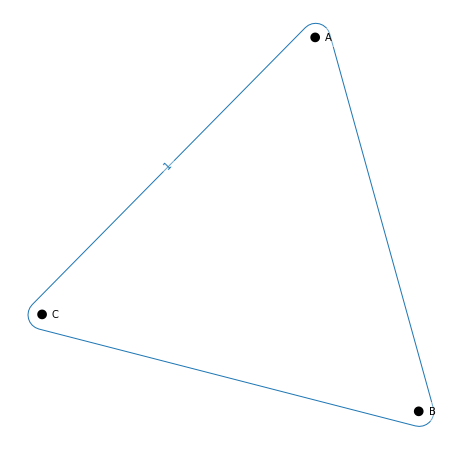

In [26]:
h = hnx.Hypergraph(triangle)
hnx.draw(h)

## Studying Hypergraphs

Graphs - Connected Components, Cycles

What is a cycle?

Higher dimensional cycles? 

## Homology

Homology is a tool from algebraic topology that counts "holes" in any dimension

0th homology - gaps between connected components

1st homology - loops

### Simplicial Complex

A simplicial complex is a hypergraph that is closed under taking subsets

Built from simplices:

Dim 0 - points, Dim 1 - edges, Dim 2 - triangles, Dim 3 - tetrahedra

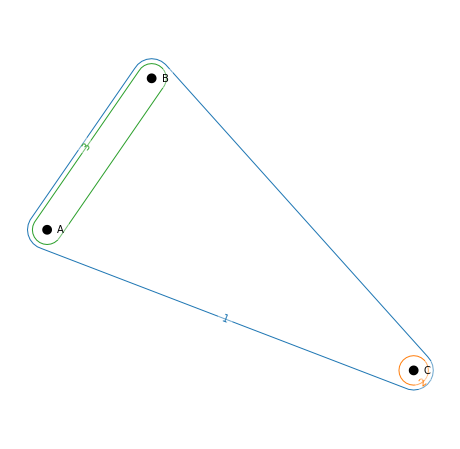

In [4]:
simcomp = {'1': {'A', 'B'}, '2': {'B', 'C'}, '3': {'A', 'C'}, '4': {'A'}, '5': {'B'}, '6':{'C'}}
simple = {'1': {'A', 'B', 'C'}, '2': {'C'}, '3': {'A', 'B'}}

h = hnx.Hypergraph(simple)
hnx.draw(h)

<img src = "https://github.com/christopher-potvin/HypergraphHomology/blob/main/Pictures/001K.PNG?raw=true">

### Simplicial Homology

$C_p$: Linear combinations of $p$-dim simplices with boundary map $\partial_p$

$ \to C_p \xrightarrow{\partial_p} C_{p-1} \xrightarrow{\partial_{p-1}} \ldots \xrightarrow{\partial_2} C_1 \xrightarrow{\partial_1} C_0 \xrightarrow{\partial_0} 0$

$\partial^2 = 0$

$H_p =\frac{ker(\partial_p)}{im(\partial_{p+1})}$ and $rk(H_p) = \beta_p$, the $p$-th Betti number

### Hypergraph Homology - Where's the Boundary?

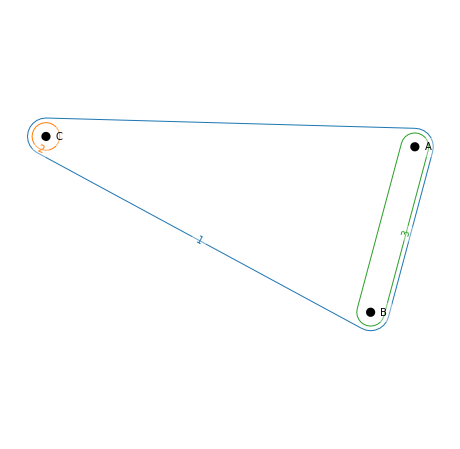

In [28]:
simcomp = {'1': {'A', 'B'}, '2': {'B', 'C'}, '3': {'A', 'C'}, '4': {'A'}, '5': {'B'}, '6':{'C'}}
simple = {'1': {'A', 'B', 'C'}, '2': {'C'}, '3': {'A', 'B'}}

h = hnx.Hypergraph(simple)
hnx.draw(h)

### Hypergraph Homology



My work revolves around finding and developing homology theories for hypergraphs.



$\mathcal{H}$, a hypergraph, to $K$, its associated simplicial complex, to $T$, its barycentric subdivision

### Barycentric Subdivision

Refines a simplicial complex - preserves topology

Vertices of $T$ are simplices from $K$ 

Simplices in $T$ are face inclusions from $K$

Can be huge! (Computation is expensive)


<img src="https://github.com/christopher-potvin/HypergraphHomology/blob/main/Pictures/barycenter.png?raw=true" width ="1000" >

In [5]:
# This function computes the barycentric subdivision of the associated simplicial complex of a hypergraph.

def barycentricsubdivision(h):

    verts = set()
    edgetuples = []

    for e in h.incidence_dict.values():
        edgetuples.append(tuple(e))
    # Turns the edges into tuples since that is how they will come out of it.combinations

    for e in h.incidence_dict.values():
        verts.update([tuple(e)])
        # Adds the edges to the restricted barycentric subdivision
        for i in range(1,len(e)):
            for combo in set(it.combinations(e, i)):
                verts.update([tuple(combo)])
                #takes all length i subsets of the edge e and adds them to the vertex set of the barycentric subdivision

    Skeleton = nx.Graph()
    Skeleton.add_nodes_from(verts)
    # First builds a graph with the given vertex set. 
    

    for node1 in verts:
        for node2 in verts: 
            if node1 is not node2 and (node2, node1) not in Skeleton.edges():
                for r in range(len(node2)):
                    if node1 in it.combinations(node2, r):
                        Skeleton.add_edge(node1, node2)
    # compares every pair of two nodes to see if there should be an edge. Avoids adding loops and multiple edges, and then does add an edge if node1 is a subset of node2. This will happen when node1 is included in node2 as simplices in the associated simplicial complex.

    B = hnx.Hypergraph(list(nx.find_cliques(Skeleton)))
    # the barycentric subdivision is the clique complex of this 1-skeleton. This function returns only the maximal cliques.
    
    return B

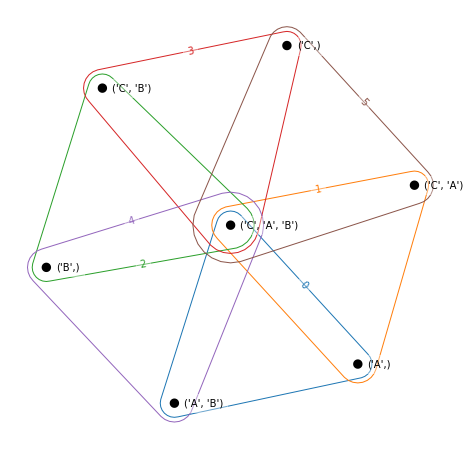

In [23]:
h = hnx.Hypergraph(simple)
B = barycentricsubdivision(h)

B
hnx.draw(B)

### Towards Hypergraph Homology

$\mathcal{H}$ to $K$ to $T$

Every subset of an edge in $\mathcal{H}$ is a vertex in $T$

Restricted - build with the edges that are there

Relative - collapse edges that are missing

### Restricted Barycentric Homology

$R$ - the subcomplex built with the vertices of $T$ that are edges in $\mathcal{H}$

$H^{res}(\mathcal{H}) = H(R)$



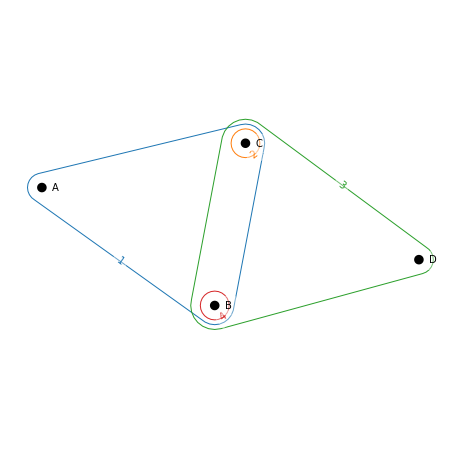

In [30]:
res = {'1': {'A','B', 'C'}, '2': {'C'}, '3': {'B','C','D'}, '4': {'B'}}
h  = hnx.Hypergraph(res)

hnx.draw(h)

<img src="https://github.com/christopher-potvin/HypergraphHomology/blob/main/Pictures/resR.png?raw=true" width="300" >

#### Constructing the Restricted Barycentric Subdivision

Vertices - hyperedges in $\mathcal{H}$

Edges - inclusions in $\mathcal{H}$

Clique Complex

In [7]:
# This is a function that takes as input a hypergraph, and forms a hypergraph based on inclusion relations in the original simplicial complex. It returns the Restricted Barycentric Subdivision of the hypergraph.

def ResBS(h):

    V = set()

    for e in h.incidence_dict.values():
        V.update([tuple(e)])
    # Turns the edges into tuples since that is how they will come out of it.combinations

    Skeleton = nx.Graph()
    Skeleton.add_nodes_from(V)
    # First builds a graph with the given vertex set. 
    

    for node1 in V:
        for node2 in V: 
            if node1 is not node2 and (node2, node1) not in Skeleton.edges():
                for r in range(len(node2)):
                    if node1 in it.combinations(node2, r):
                        Skeleton.add_edge(node1, node2)
    # compares every pair of two nodes to see if there should be an edge. Avoids adding loops and multiple edges, and then does add an edge if node1 is a subset of node2. This will happen when node1 is included in node2 as simplices in the associated simplicial complex.

    H = hnx.Hypergraph(list(nx.find_cliques(Skeleton)))
    # nx.find_cliques returns the maximal cliques of the graph, which is enough to form our hypergraph. 
    # what about finding all cliques of a specific dimension to reduce the construction time if you are only interested in specific dimensions
    
    return H

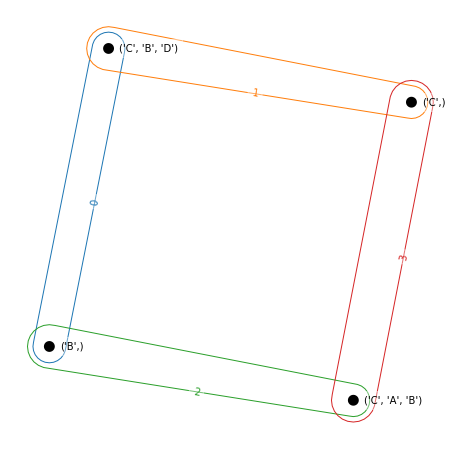

In [8]:
h = hnx.Hypergraph(res)
ResBS(h)
hnx.draw(ResBS(h))

In [9]:
#This function will find the chain complex associated to a hypergraph's associated simplicial complex. It returns the chain groups from hnx.kchainbasis and the boundary matrices from hnx.bkMatrix. 

def kchaincomplex(h, k = None, l = None, reduced = True): 
# Inputs are a hypergraph, and a minimum and maximum dimension of homology 

    C, bd = {}, {}

    C = hnx.chain_complex(h)[0]
    if reduced == True:
        bd[0] = np.ones((1, len(C[0])), dtype = int)
    bd.update(hnx.chain_complex(h)[1])

    #if len(list(h.edges())) == 0:
        #return C, bd
    #This line is here in case the hypergraph is empty. This would happen, for example, if you attempted to take the relative homology of a hypergraph that was already a simplicial complex.

    #if k == None:
        #k = 0
        #l = max([len(e) for e in h.edges()]) - 1
    # If no dimensions are input, will calculate the homology in every dimension. The max dimension of the chain groups is the max number of vertices in an edge of the hypergraph.

    #if l == None:
        #l = k  
    # If only one dimension is entered, the homology will only be computed in that dimension

    #for i in range(max(0,k-1),l+2):
        #C[i] = hnx.kchainbasis(h, i)
        #if k == 0:
            #bd[0] = np.ones((1, len(C[0])), dtype = int)
        #if i > max(k-1,0): 
            #bd[i] = hnx.bkMatrix(C[i-1], C[i])
    # See hnx for more information about kchainbasis or bkMatrix. All 0-chains are mapped to 0, hence the row of 1s for bd[0]. It can be viewed as the boundary of a vertex is the (-1)-dimensional empty chain. 

    return C, bd

In [10]:
# This function takes as input the dictionary of boundary matrices and returns the Smith Normal Form decompositions of those matrices, as well as their ranks, kernels, and cokernels. For more information on where the kernel and cokernel come from, as well as the Smith Normal Form decomposition, see hypernetx tutorial 5. 

def SNF(bd):

    P,Q,S,Pinv,rkS,kernel,cok = [],[],[],[],[],[],[]
    for key in bd:
        X,Y,Z,Xinv = hnx.smith_normal_form_mod2(bd[key])
        P += [X]
        Q += [Y]
        S += [Z]
        Pinv += [Xinv]
        rkS += [np.sum(Z)]
        kernel += [Y[:,np.sum(Z):]]
        cok += [Xinv[:,np.sum(Z):]] 
    
    return P, Q, S, Pinv, rkS, kernel, cok

In [11]:
# This function takes as input a hypergraph and a minimum and maximum dimension and returns as output the homology generators, basis as matrices, Betti numbers, and related matrices that are needed later. 

def homology(h, k=None, l= None):

    C, bd = kchaincomplex(h, k, l)
    #Starts by computing the chain groups in the requested dimensions


    if k == None:
        k = 0

    P, Q, S, Pinv, rkS, kernel, cok = SNF(bd)
    homgen = []
    coeff = []
    basis = {}
    gens = []
    B = []

    for i in range(len(bd)-1):
        coeff += [np.matmul(P[i+1],kernel[i])[rkS[i+1]:,:] % 2]
        homgen += [np.matmul(cok[i+1], coeff[i]) % 2]
    # for each boundary matrix (except the highest), multiply its kernel by some specific rows in the P matrix of the Smith normal form to project it into the cokernel of the next highest boundary matrix. Then multiply that matrix by the cokernel matrix to rewrite it in terms of the canonical basis for the chain groups. Check out hnx tutorial 5 for more details on why to do this and why it works. 

    if len(kernel) > 0:
        homgen += [kernel[-1]] 
    # if you have a largest dimension boundary matrix (so unless the hypergraph is empty), add the last entry of the kernel to the homology. 

    for i in range(len(bd)-1):
        basis[i] = []
        basis[i] += [b for b in hnx.reduced_row_echelon_form_mod2(homgen[i].transpose())[1] if np.sum(b)>0]
        #the homgen matrix might be linearly dependent so row reduce it to get the basis for the homology. 
        if not homgen[i].any():
            B += [0]
        else:
            B += [np.linalg.matrix_rank(homgen[i])]
        #add the rank of the homgen matrix in each dimension to the list of Betti numbers.

        for row in hnx.reduced_row_echelon_form_mod2(homgen[i].transpose())[1]:
            if np.sum(row) > 0:
                gens += [[C[i+k][x] for x in range(len(row)) if row[x] == 1]] 
        #This rewrite the basis for homology in terms of the chain groups, you have to add k to the index to get the correct index in C. This is the reason for the set k = 0 line earlier. 

    return gens, basis, B, C, P, rkS, cok
    #gens is the homology generators written in terms of the chain groups
    #basis is the homology generators as arrays
    #B is the sequence of Betti numbers from dimensions k to l
    #C is the chain groups
    #P is a component of Smith normal form needed later
    #rkS is the ranks of the Smith normal form matrices
    #cok is the cokernel of the boundary maps, also needed later


### Computing Restricted Barycentric Homology

In [31]:
# This function finds the restricted barycentric homology of a hypergraph. It returns the sequence of restricted Betti numbers in the given dimensions.

def restrictedhomology(h, k=None,l=None):

    H = ResBS(h)
    # First, we find the restricted barycentric subdivision of h, which is returned as a hypergraph H.
    gens, basis, B, C, P, rkS, cok = homology(H, k, l)
    # The restricted barycentric homology of the original hypergraph is the homology of this hypergraph H.

    return B

[0, 0]

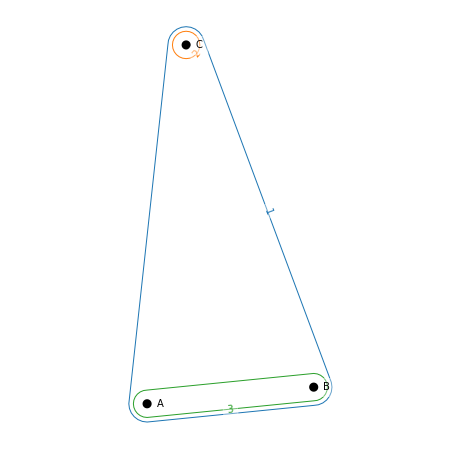

In [33]:
h = hnx.Hypergraph(simple)
hnx.draw(h)
restrictedhomology(h)

### Application of 0th Restricted Homology: Spy Network

imagine you have a spy network, where each edge with more than 1 vertex represents who can transport messages with a certain code. officers who have the code translations are given single vertex edges around them.  

the 0th homology will tell you the number of different communication gaps your network has, as we will see, this is different than traditional connected components

[1, 0]

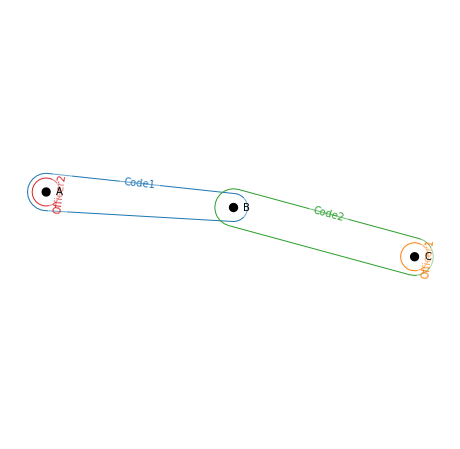

In [37]:
spies = {'Code1': {'A','B'}, 'Officer1': {'C'}, 'Code2': {'B','C'}, 'Officer2': {'A'}}
h = hnx.Hypergraph(spies)
hnx.draw(h)
restrictedhomology(h)

### Relative Homology

Let $S \subset K$. Define $C(K,S)$ as $\frac{C(K)}{C(S)}$.

$H(K,S)$ is the homology of that chain complex.

"Homology of K after collapsing S"

### Relative Barycentric Homology



$S$ - the subcomplex built with the vertices of $T$ that are **not** edges in $\mathcal{H}$

$H^{res}(\mathcal{H}) = H(T,S)$


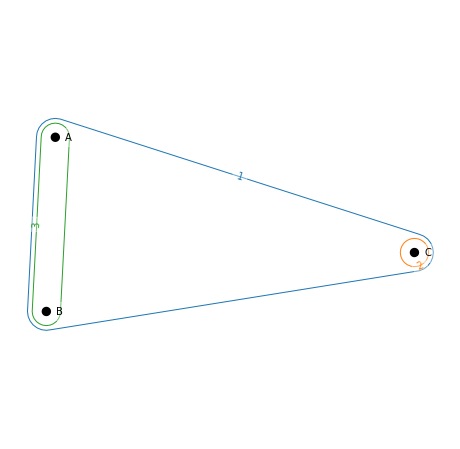

In [15]:
simple = {'1': {'A', 'B', 'C'}, '2': {'C'}, '3': {'A', 'B'}}

h = hnx.Hypergraph(simple)
hnx.draw(h)

<img src="https://github.com/christopher-potvin/HypergraphHomology/blob/main/Pictures/111A.PNG?raw=true" width="500" >

<img src="https://github.com/christopher-potvin/HypergraphHomology/blob/main/Pictures/001A.PNG?raw=true" width="500" >

### Computation

Long Exact Sequence of a Pair - Image = Kernel Everywhere

$ \ldots \to H_p(S) \to H_p(T) \to H_p(T,S) \to H_{p-1}(S) \to H_{p-1}(T) \to \ldots$

No relative homology!

No barycentric subdivision!

In [16]:
# This function will take subsets of edges in a hypergraph h and partition them based on whether or not they are edges. The set of edges will form the vertices for the restricted barycentric subdivision, while the set of nonedges will form the vertices of the missing subcomplex. 

def missingsubcomplex(h):

    V = set()
    edgetuples = []

    for e in h.incidence_dict.values():
        edgetuples.append(tuple(e))
    # Turns the edges into tuples since that is how they will come out of it.combinations

    for e in h.incidence_dict.values():
        # Adds the edges to the restricted barycentric subdivision
        for i in range(1,len(e)):
            for combo in sorted(set(it.combinations(e, i))):
                #takes all length i subsets of the edge e
                if combo not in edgetuples: 
                    V.update([tuple(sorted(combo))])
                    # The subsets of edges that are not themselves edges get added to the missing subcomplex

    Skeleton = nx.Graph()
    Skeleton.add_nodes_from(V)
    # First builds a graph with the given vertex set. 
    

    for node1 in V:
        for node2 in V: 
            if node1 is not node2 and (node2, node1) not in Skeleton.edges():
                for r in range(len(node2)):
                    if node1 in it.combinations(node2, r):
                        Skeleton.add_edge(node1, node2)
    # compares every pair of two nodes to see if there should be an edge. Avoids adding loops and multiple edges, and then does add an edge if node1 is a subset of node2. This will happen when node1 is included in node2 as simplices in the associated simplicial complex.


    H = hnx.Hypergraph(list(nx.find_cliques(Skeleton)))
    # nx.find_cliques returns the maximal cliques of the graph, which is enough to form our hypergraph. 
    # what about finding all cliques of a specific dimension to reduce the construction time if you are only interested in specific dimensions
    
    return H

In [17]:
# In relative homology, it is necessary to compute the matrix for the map from the missing subcomplex back to the original simplicial complex associated to the hypergraph. This functions computes those matrices as arrays. It takes as inputs the chain groups for the original simplicial complex and for the missing subcomplex, as well as the minimum dimension computed. 

def StoK(CK,CS, k):

    if k == None:
        k = 0

    i,j,m,n = 0,0,0,0
    StoKmats = [] 
    while m < len(CS)-1: 
        StoKmats += [np.zeros((len(CK[m+k]),len(CS[m+k])), dtype = int)] 
        # For each dimension of the missing subcomplex, initiate an array with the proper dimensions, rows are the (m+k) cells of the Associated Simplicial Complex, and columns are the (m+k) cells of the missing subcomplex. 
        while i < len(CS[m+k]):
            Phi = []
            while j < len(CS[m+k][i]): 
                Phi += list(CS[m+k][i][j][0])
                j = j + 1 
                # For a particular (m+k) simplex in the missing subcomplex, each vertex comprising that cell is a simplex in K. Phi ends up as a list of all of the first vertices in each simplex in the associated simplicial complex that makes up the simplex in the missing subcomplex.
                if j == (len(CS[m+k][i])): 
                    for n in range(0,len(CK[m+k])): 
                        if Phi == list(CK[m+k][n]):
                            StoKmats[m][n,i] = 1
                # Once done making the list of all the first elements, run through the (m+k) simplices in the associated simplicial complex, if there is a match with Phi, add a 1 in the corresponding entry in the matrix. 
            i = i + 1 
            j = 0 
        m = m + 1 
        i = 0 
        # Do this for each simplex in each dimension of the missing subcomplex. 

    return StoKmats

In [18]:
# The purpose of this function is to compute the map induced on homology by the StoK map. It needs as input the homology generators of the missing subcomplex, the matrices StoK, and the information from Smith Normal Form that allows projection into the cokernel. The point is to see which homologies of the missing subcomplex are still homologies in the associated simplicial complex.

def StoKhom(basisS, StoKmats, CK, PK, rkSK, cokerK, k):
    Z, Proj, StoCokerK, StoKhommats = {}, {}, {}, {}
    Ob = []
    Bettiob = [] 

    if k == None:
        k = 0

    for i in range(len(basisS)):
        # for each dimension of S
        Ob.append(np.zeros([1,len(CK[i+k])],int))
        #Makes sure that Ob is an array of the correct dimension.
        for j in range(len(basisS[i])):
            # For each homology generator in dimension i+k of S
            Z[i,j] = np.matmul(StoKmats[i],basisS[i][j]) % 2
            # Z is the result of mapping the homology generator of S into K, using the matrices from the above function. 
            Proj[i,j] = [CK[i+k][x] for x in range(len(Z[i,j])) if Z[i,j][x] == 1]
            # Proj write Z in terms of the chain groups of K instead of just as an array
            StoCokerK[i,j] = np.matmul(PK[i+1],Z[i,j])[rkSK[i+1]:] % 2
            # StoCokerK projects Z into the cokernel, if this is not zero, that homology generator of S is also a homology of K and presents an obstruction
            StoKhommats[i,j] = np.matmul(cokerK[i+1],StoCokerK[i,j]) % 2
            # rewrites the obstructions in terms of the canonical basis for the chain groups of K
            Ob[i] = np.vstack((Ob[i],StoKhommats[i,j])) 
            # adds this representation to the ob matrix
        Bettiob.append(np.linalg.matrix_rank(Ob[i]))
        # For each dimension, the rank of the ob matrix represents the rank of the induced map on homology of the S to K map. 

    return Ob, Bettiob

In [19]:
# This function finishes computing the relative Betti numbers of a hypergraph. It takes as inputs the Betti numbers of the associated simplicial complex K, of the missing subcomplex S, the ranks of the maps induced on homology by the S to K map, and the dimensions of homology to be computed. It returns the Betti numbers of the relative homology of the hypergraph. A nonzero entry in Bettiob needs to be subtracted from the same and the next highest dimension of homology of the hypergraph.

def relBetti(BK, BS, Bettiob, k, l):

    BH = []

    if len(Bettiob) > 0:
        if k == 0 or k == None:
            BH += [BK[0]- Bettiob[0]] # There isn't a (-1) dimensional homology of S. 
        
            if k == None or l is not None:
                for i in range(1, len(BS)):
                    BH += [BK[i]+BS[i-1]-Bettiob[i]-Bettiob[i-1]] 
                    # In most cases, the rank of a relative homology group is the rank of the same dimension of H(K) + the rank of the next smallest dimension of H(S) - the obstructions in those two dimensions. 

                if k == None: 
                    BH += [BK[len(BS)] + BS[len(BS)-1] - Bettiob[len(BS)-1]]

                    for i in range(len(BS)+1,len(BK)):
                        BH += [BK[i]]
                    # Once you are in dimensions bigger than the the dimension of the missing subcomplex, the relative Betti numbers are the Betti numbers of K. 

        else:
            for i in range(1, len(BS)):
                BH += [BK[i]+BS[i-1]-Bettiob[i]-Bettiob[i-1]]

    else: #If the missing subcomplex is empty
        BH = BK

    return BH

In [20]:
# This function finds the relative barycentric homology of a hypergraph in the range of the given dimensions. Although the indices change slightly for each case, the steps are the same and are as follows. First, the homology of the associated simplicial complex of the hypergraph, K, is found. Then, using barycentricpartition, the subsets of edges in h that are not edges are used to form the vertex set of the missing subcomplex S. Then the hypergraph H is the hypergraph with edges the maximal cliques of the graph on that vertex set based on inclusions on K. The homology of H is taken, and then S is mapped into K with StoK, and the ranks of the map induced on homology are calculated. These are summed into the final relative Betti numbers of the original hypergraph. 

def relativehomology(h, k=None,l=None):

    H = missingsubcomplex(h)
    if len(list(H.edges())) == 0:
        BH = homology(h,k,l)[2]

    elif k == 0 or k == None:
        gensK, basisK, BK, CK, PK, rkSK, cokerK  = homology(h,k,l)
        #Takes the simplicial homology of K
        H = missingsubcomplex(h)
        #Finds the missing subcomplex.
        gensS, basisS, BS, CS, PS, rkSS, CokerS = homology(H,k,l)
        #Takes the homology of the missing subcomplex.
        StoKmats = StoK(CK, CS, k)
        #Finds the matrices for the map from S to K.
        Ob, Bettiob = StoKhom(basisS, StoKmats, CK, PK, rkSK, cokerK, k)
        #Finds the Betti values for the homologies in both S and K. 
        BH = relBetti(BK, BS, Bettiob, k, l)
        #Sums up the relative Betti numbers of the hypergraph. 

    # If the minimum dimension k is not 0, must compute the intermediate steps for k-1 since the k-1 homology of K and S might affect the k dimensional relative homology of the hypergraph. The elif happens when only one number is input, and that is the only dimension of homology to compute. 
    elif k is not None and l is None:
        gensK, basisK, BK, CK, PK, rkSK, cokerK  = homology(h,k-1,k)
        gensS, basisS, BS, CS, PS, rkSS, CokerS = homology(H,k-1,k)
        StoKmats = StoK(CK, CS, k-1)
        Ob, Bettiob = StoKhom(basisS, StoKmats, CK, PK, rkSK, cokerK, k-1)
        BH = relBetti(BK, BS, Bettiob, k, l)

    #This one runs when both a minimum and maximum dimension are given. 
    else:    
        gensK, basisK, BK, CK, PK, rkSK, cokerK  = homology(h,k-1,l)
        gensS, basisS, BS, CS, PS, rkSS, CokerS = homology(H,k-1,l)
        StoKmats = StoK(CK, CS, k-1)
        Ob, Bettiob = StoKhom(basisS, StoKmats, CK, PK, rkSK, cokerK, k-1)
        BH = relBetti(BK, BS, Bettiob, k, l)

    return BH

In [38]:
simple = {'1': {'A', 'B', 'C'}, '2': {'C'}, '3': {'A', 'B'}}
StoKex = {'1': {'A', 'B', 'C'}, '2': {'A', 'D', 'E'}, '3': {'C', 'E', 'F'}}
StoKex2 = {'1': {'A', 'B', 'C'}, '2': {'A', 'D', 'E'}, '3': {'C', 'E', 'F'}, '4': {'A'}}
tetra = {'1':{'A','B','C'}, '2':{'A','B','D'}, '3':{'A','C','D'}, '4':{'B','C','D'}}
complex = {'1': {'A', 'B'}, '2': {'B', 'C'}, '3': {'A', 'C'}, '4': {'A'}, '5': {'B'}, '6':{'C'}}
bigedge = {'1': {'A','B','C','D','E'}}

h = hnx.Hypergraph(StoKex)
relativehomology(h)

[0, 0, 3]

### Results on Relative Barycentric Homology

$H^{rel}_0(\mathcal{H})$ - Simplicial components

Mayer Vietoris - Gluing together hypergraphs

Maximum Edge - $\mathcal{H}$ with $E \subset e$, $|e| = m$

$H^{rel}_1$ - Path components of $S$; $H^{rel}_{m-1}$ - any subedges?

# Future Work

Topology

Combinatorics

Data Analysis

## Topology

Look at $H(T,R)$ - quotient by present edges

Functoriality/Categories

Standards from Algebraic Topology (Excision, Dualities)

Persistence/Dynamic Hypergraphs

## Combinatorics

Hypergraphs with the same $K$ 

Hierarchy of Acyclicities

Look for important subgraphs

## Data Analysis

Code for generators

Analyze complex interrational network data

Apply to temporal/dynamic data

# Thank you!

HypernetX - https://github.com/pnnl/HyperNetX

A Virus in a Fungus in a Plant - https://www.science.org/doi/10.1126/science.1136237

Questions? 

## Try it! 

All of the examples we've used so far are below. Try other hypergraphs and use this notebook on your own data! 

The Betti numbers for K:  [0, 0, 0]
The restricted Betti numbers:  [0, 1]
The relative Betti numbers:  [0, 2, 0]


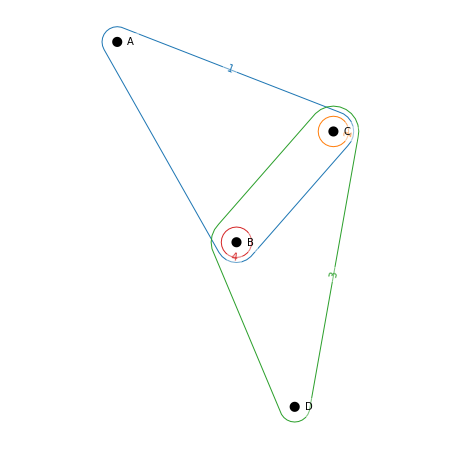

In [22]:
res = {'1': {'A','B', 'C'}, '2': {'C'}, '3': {'B','C','D'}, '4': {'B'}}
simple = {'1': {'A', 'B', 'C'}, '2': {'C'}, '3': {'A', 'B'}}
StoKex = {'1': {'A', 'B', 'C'}, '2': {'A', 'D', 'E'}, '3': {'C', 'E', 'F'}}
StoKex2 = {'1': {'A', 'B', 'C'}, '2': {'A', 'D', 'E'}, '3': {'C', 'E', 'F'}, '4': {'A'}}
tetra = {'1':{'A','B','C'}, '2':{'A','B','D'}, '3':{'A','C','D'}, '4':{'B','C','D'}}
complex = {'1': {'A', 'B'}, '2': {'B', 'C'}, '3': {'A', 'C'}, '4': {'A'}, '5': {'B'}, '6':{'C'}}
bigedge = {'1': {'A','B','C','D','E'}}
h = hnx.Hypergraph(res)


hnx.draw(h)
print('The Betti numbers for K: ', homology(h)[2])
print('The restricted Betti numbers: ', restrictedhomology(h))
print('The relative Betti numbers: ', relativehomology(h))